In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi']= 100
plt.rcParams['text.usetex'] = True

# Haptic switch

In [2]:
with open('./data/switch/switch_13dec_00_17_sc5_tk3', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=2)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
haptic_pos = data[:,1:4]
haptic_gripper = data[:,4]
haptic_ori = np.zeros((n_rows,3,3))
haptic_control_on = data[:,14]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,24:27]
ee_pose_num_des = data[:,27]

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,5:8], data[i,8:11], data[i,11:14]))
    ee_ori[i] = np.vstack((data[i,15:18], data[i,18:21], data[i,21:24]))

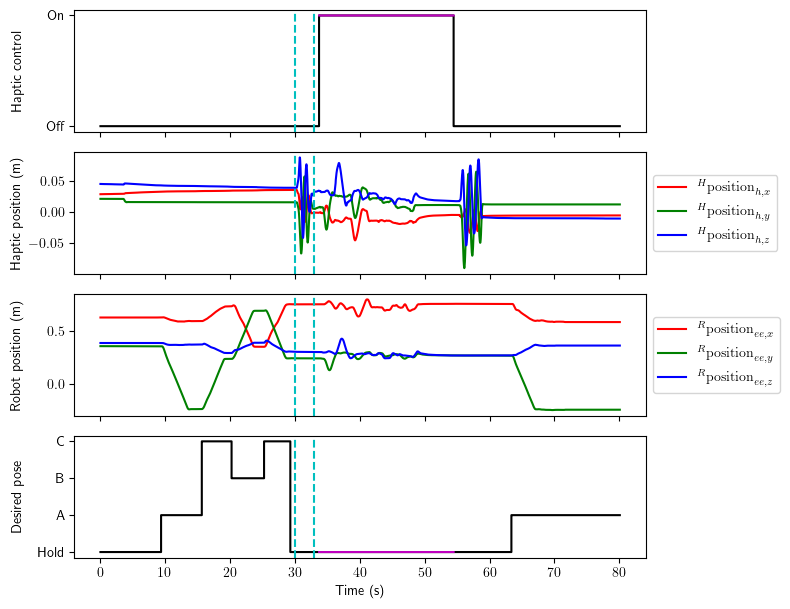

In [3]:
n_plots = 4
fig, axs = plt.subplots(n_plots, 1, sharex=True, figsize=(8,6))

# color x,y,z as rgb with labels
color_list = ['r', 'g', 'b']
haptic_labels = [r'$^{H} \textrm{position}_{h,x}$',
                 r'$^{H} \textrm{position}_{h,y}$',
                 r'$^{H} \textrm{position}_{h,z}$']
robot_labels = [r'$^{R} \textrm{position}_{ee,x}$',
                r'$^{R} \textrm{position}_{ee,y}$',
                r'$^{R} \textrm{position}_{ee,z}$']
for i, color in enumerate(color_list):
    axs[1].plot(time, haptic_pos[:,i], color=color, label=haptic_labels[i])
    axs[2].plot(time, ee_pos[:,i], color=color, label=robot_labels[i])
    
# make step plots for integer data
on_ind = np.asarray(haptic_control_on == 1).nonzero()
axs[0].step(time, haptic_control_on, 'k')
axs[3].step(time, ee_pose_num_des, 'k')
axs[0].step(time[on_ind], haptic_control_on[on_ind], 'm')
axs[3].step(time[on_ind], ee_pose_num_des[on_ind], 'm')

# set integer data y-labels
axs_indices = [0, 3]
y_ticks = [[0, 1], [0, 1, 2, 3]]
y_tick_labels = [["Off", "On"], ["Hold", "A", "B", "C"]]
for i, axs_index in enumerate(axs_indices):
    axs[axs_index].set_yticks(y_ticks[i])
    axs[axs_index].set_yticklabels(y_tick_labels[i])

# set vertical lines and all y-labels
x_positions = [30, 33]
y_labels = ["Haptic control", "Haptic position (m)", "Robot position (m)", "Desired pose"]
for i in range(n_plots):
    axs[i].set_ylabel(y_labels[i])
    # add vertical lines
    for x_position in x_positions:
        axs[i].axvline(x=x_position, color='c', linestyle='--')

axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
fig.align_ylabels()
fig.tight_layout()

plt.xlabel("Time (s)")
plt.show()

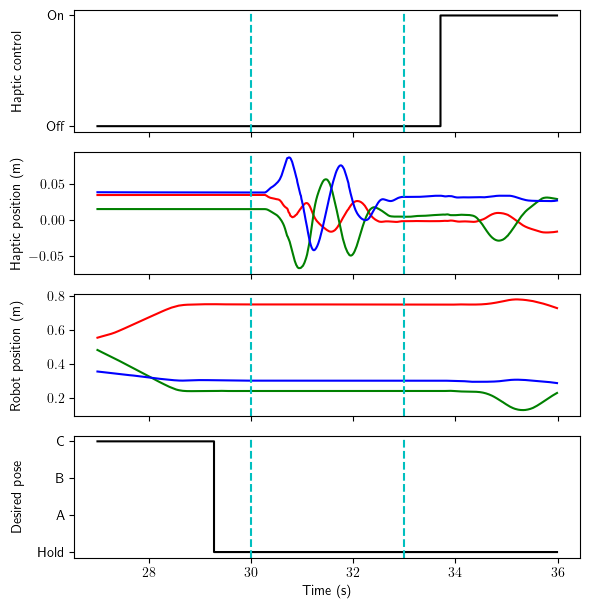

In [4]:
n_plots = 4
fig, axs = plt.subplots(n_plots, 1, sharex=True, figsize=(6,6))

# find time region of interest
clipped_ind = np.asarray((time>=27) & (time<=36)).nonzero()

# color x,y,z as rgb
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[1].plot(time[clipped_ind], haptic_pos[:,i][clipped_ind], color=color)
    axs[2].plot(time[clipped_ind], ee_pos[:,i][clipped_ind], color=color)
# make step plots for integer data
axs[0].step(time[clipped_ind], haptic_control_on[clipped_ind], 'k')
axs[3].step(time[clipped_ind], ee_pose_num_des[clipped_ind], 'k')

# set integer data y-labels
axs_indices = [0, 3]
y_ticks = [[0, 1], [0, 1, 2, 3]]
y_tick_labels = [["Off", "On"], ["Hold", "A", "B", "C"]]
for i, axs_index in enumerate(axs_indices):
    axs[axs_index].set_yticks(y_ticks[i])
    axs[axs_index].set_yticklabels(y_tick_labels[i])

# set vertical lines and all y-labels
x_positions = [30, 33]
y_labels = ["Haptic control", "Haptic position (m)", "Robot position (m)", "Desired pose"]
for i in range(n_plots):
    axs[i].set_ylabel(y_labels[i])
    # add vertical lines
    for x_position in x_positions:
        axs[i].axvline(x=x_position, color='c', linestyle='--')

fig.align_ylabels()
fig.tight_layout()

plt.xlabel("Time (s)")
plt.show()

# Lightbulb

PLOT MOMENT AND ANGULAR VELOCITY FOR SCENE 6 TAKE 5

In [5]:
with open('./data/lightbulb/lightbulb_13dec_17_40_sc6_tk5', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=2)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
haptic_pos = data[:,1:4]
haptic_gripper = data[:,4]
haptic_ori = np.zeros((n_rows,3,3))
haptic_control_on = data[:,14]
ee_force = data[:,15:18]
ee_moment = data[:,18:21]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,30:33]
ee_pose_num_des = data[:,33]

for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,5:8], data[i,8:11], data[i,11:14]))
    ee_ori[i] = np.vstack((data[i,21:24], data[i,24:27], data[i,27:30]))

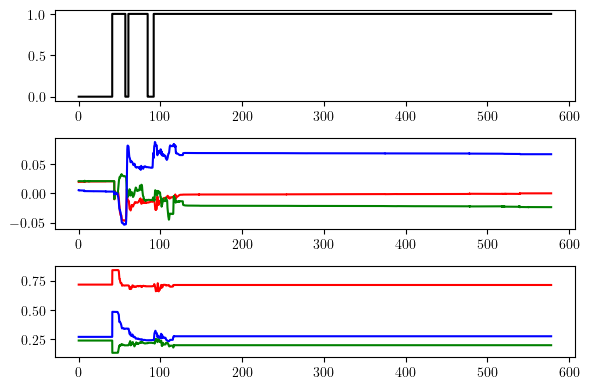

In [6]:
fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[1].plot(time, haptic_pos[:,i], color=color)
    axs[2].plot(time, ee_pos[:,i], color=color)
axs[0].step(time, haptic_control_on, 'k')

fig.tight_layout()
plt.show()

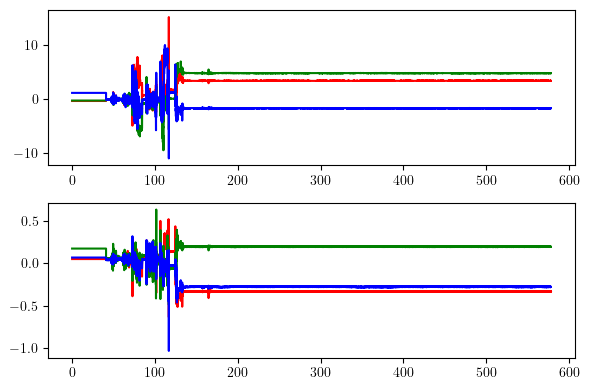

In [7]:
fig, axs = plt.subplots(2, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_force[:,i], color=color)
    axs[1].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
plt.show()

# Optitrack 2 arms

use world urdf pandaapps to get table positions for robot -- plot orientation error

In [8]:
with open('./data/optitrack_2arm/optitrack_2arm_12dec_20_55_sc2_tk3', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=4000)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
lead_ori = np.zeros((n_rows,3,3))
lead_pos = data[:,10:13]
support_ori = np.zeros((n_rows,3,3))
support_pos = data[:,22:25]
cap_ori = data[:,25:29]
cap_pos = data[:,29:32]

for i in range(n_rows):
    lead_ori[i] = np.vstack((data[i,1:4], data[i,4:7], data[i,7:10]))
    support_ori[i] = np.vstack((data[i,13:16], data[i,16:19], data[i,19:22]))

In [9]:
# rotate data to support robot frame
optitrack_support_angle = np.deg2rad(62.5)
c = np.cos(optitrack_support_angle)
s = np.sin(optitrack_support_angle)
R_optitrack_in_support_frame = R.from_matrix([
    [s, 0, -c],
    [-c, 0, -s],
    [0, 1, 0]
])
pos_support_ref_in_optitrack_frame = np.array([-0.508397, 0.847871, 0.313138])
pos_support_ref_in_support_frame = np.array([0.048436, 0.275109, 0.922579])

# R_optitrack_in_support_frame = R.from_euler('x', 90, degrees=True) * R.from_euler('y', -107.5, degrees=True)
cap_pos_in_support_frame = R_optitrack_in_support_frame.apply(cap_pos + pos_support_ref_in_optitrack_frame)
cap_pos_in_support_frame += pos_support_ref_in_support_frame

R_support_in_lead_frame = R.from_euler('z', -80, degrees=True)
support_pos_in_lead_frame = R_support_in_lead_frame.apply(support_pos)

# support_pos_in_lead_frame += lead_pos[0] - support_pos_in_lead_frame[0]

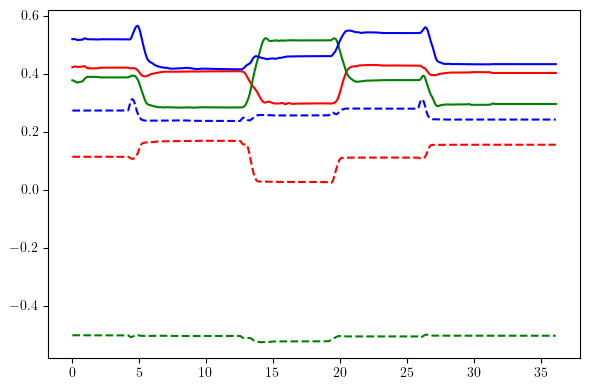

In [10]:
# fig, axs = plt.subplots(3, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
#     axs[0].plot(time, support_pos[:,i], color=color)
    plt.plot(time, support_pos_in_lead_frame[:,i], color=color, linestyle='--')
    plt.plot(time, lead_pos[:,i], color=color)
#     axs[2].plot(time, cap_pos[:,i], color=color)
#     axs[2].plot(time, cap_pos_in_support_frame[:,i], color=color)

plt.tight_layout()
plt.show()

# Haptic 2 arm (fake take)

use Elena's tool to reproduce plot -- compute velocity ANGULAR

In [11]:
with open('./data/2arm_bottle_Clyde_feb23_sc08_fktk2', 'rb') as f:
    clean_lines = (line.replace(b',',b'').replace(b'[',b'').replace(b']',b'') for line in f)
    data = np.genfromtxt(clean_lines, dtype=float, delimiter=None, skip_header=700)
    
n_rows, n_cols = np.shape(data)
time = data[:,0]
time -= min(time)
sensed_force = data[:,1:4]
sensed_torque = data[:,4:7]
haptic_pos = data[:,7:10]
haptic_ori = np.zeros((n_rows,3,3))
joint_pos = data[:,19:26]
haptic_gripper_state = data[:,26]
ee_force = data[:,27:30]
ee_moment = data[:,30:33]
ee_ori = np.zeros((n_rows,3,3))
ee_pos = data[:,42:45]

ee_vel = np.zeros((n_rows,3))
for i in range(n_rows):
    haptic_ori[i] = np.vstack((data[i,10:13], data[i,13:16], data[i,16:19]))
    ee_ori[i] = np.vstack((data[i,33:36], data[i,36:39], data[i,39:42]))
    
    # express ee_force and ee_moment in ee frame (not robot base frame)
    ee_force[i] = ee_ori[i].transpose() @ ee_force[i]
    ee_moment[i] = ee_ori[i].transpose() @ ee_moment[i]
    
    # compute ee linear velocity
    if i > 0:
        ee_vel[i] = (ee_pos[i] - ee_pos[i-1]) / (time[i] - time[i-1])

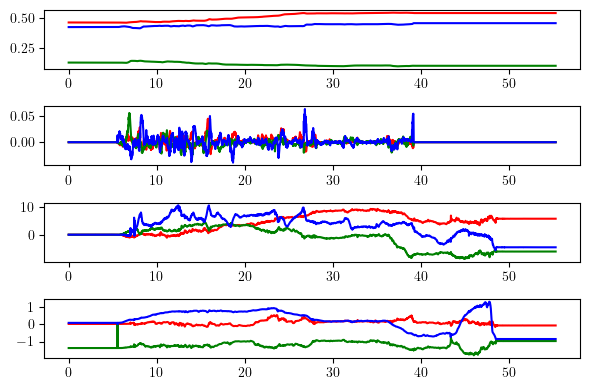

In [12]:
fig, axs = plt.subplots(4, 1)
color_list = ['r', 'g', 'b']
for i, color in enumerate(color_list):
    axs[0].plot(time, ee_pos[:,i], color=color)
    axs[1].plot(time, ee_vel[:,i], color=color)
    axs[2].plot(time, ee_force[:,i], color=color)
    axs[3].plot(time, ee_moment[:,i], color=color)

fig.tight_layout()
plt.show()